# This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes.

BoomBikes have contacted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 

The company wants to know:

**Which variables are significant in predicting the demand for shared bikes.**

**How well those variables describe the bike demands**

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

**Business Goal:**

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [804]:
#Import All libraries needed for Linear Regression Case Study
# seaborn, matplotlib, sklearn, statsmodels
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 60)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [805]:
# Importing bike sharing data day.csv
bike_sharing = pd.read_csv('day.csv',index_col=0)

# Dictionary Values
|	Column_name	|	 Description	|
|	------	|	------	|
|   dteday | date |
|	season 	|	 season (1 : spring, 2 : summer, 3 : fall, 4 : winter)	|
|	 yr 	|	 year (0 : 2018, 1 : 2019)	|
|	mnth 	|	 month ( 1 to 12)	|
|	holiday 	|	 weather day is a holiday or not (extracted from http//dchr.dc.gov/page/holiday-schedule)	|
|	weekday 	|	 day of the week	|
|	workingday 	|	 if day is neither weekend nor holiday is 1, otherwise is 0.	|
|	weathersit 	|	---	|
|	 1	|	 Clear, Few clouds, Partly cloudy, Partly cloudy	|
|	 2	|	 Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist	|
|	 3	|	 Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds	|
|	 4	|	 Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog	|
|	temp 	|	 temperature in Celsius	|
|	atemp	|	 feeling temperature in Celsius	|
|	hum	|	 humidity	|
|	windspeed	|	 wind speed	|
|	casual	|	 count of casual users	|
|	registered	|	 count of registered users	|
|	cnt	|	 count of total rental bikes including both casual and registered	|

In [806]:
#show bike sharing adta head
bike_sharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


In [807]:
#show bike sharing data info
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [808]:
#individual column data checking
bike_sharing['weekday'].value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [809]:
#bike sharing data shape
bike_sharing.shape

(730, 15)

In [810]:
#describe numerical columns
bike_sharing.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,2.50,0.50,6.53,0.03,3.00,0.68,1.39,20.32,23.73,62.77,12.76,849.25,3658.76,4508.01
std,1.11,0.50,3.45,0.17,2.01,0.47,0.54,7.51,8.15,14.24,5.20,686.48,1559.76,1936.01
min,1.00,0.00,1.00,0.00,0.00,0.00,1.00,2.42,3.95,0.00,1.50,2.00,20.00,22.00
25%,2.00,0.00,4.00,0.00,1.00,0.00,1.00,13.81,16.89,52.00,9.04,316.25,2502.25,3169.75
50%,3.00,0.50,7.00,0.00,3.00,1.00,1.00,20.47,24.37,62.62,12.13,717.00,3664.50,4548.50
75%,3.00,1.00,10.00,0.00,5.00,1.00,2.00,26.88,30.45,72.99,15.63,1096.50,4783.25,5966.00
max,4.00,1.00,12.00,1.00,6.00,1.00,3.00,35.33,42.04,97.25,34.00,3410.00,6946.00,8714.00


In [811]:
#count total number of null values, there are zero null values
bike_sharing.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

'dteday','casual','registered' columns are not useful for our analysis, so removing them from bike sharing data frame

In [812]:
bike_sharing.drop(['dteday','casual','registered'],axis=1,inplace=True)

In [813]:
#remove duplicates if any
bike_sharing.drop_duplicates(inplace=True)

converting numerical labels into categorical string values for model analysis

'season','weathersit','mnth','weekday' are converted here

In [814]:
bike_sharing['season'].replace({1:'spring',2:'summer',3:'fall',4:'winter'},inplace=True)
bike_sharing['weathersit'].replace({1:'clear',2:'moderate',3:'bad',4:'severe'},inplace=True)
bike_sharing['mnth'].replace({1:'january',2:'february',3:'march',4:'april',5:'may',6:'june',7:'july',8:'august',9:'september',
                   10:'october',11:'november',12:'december'},inplace=True)
bike_sharing['weekday'].replace({5:'sunday',6:'monday',0:'tuesday',1:'wednesday',2:'thursday',3:'friday',4:'saturday'},inplace=True)

In [815]:
#show type of each column in bike sharing data frame
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


divide bike sharing data frame columns into numeric and categoric columns

In [816]:
df=bike_sharing
numerics = ['int16', 'int32', 'int64','float32','float64']
categoric = ['object',"category"]
#get numeric and categoric columns for data analysis
df_visu_numeric = df.select_dtypes(include=numerics)
df_visu_categoric = df.select_dtypes(include = categoric)

In [817]:
#print length of numeric and categoric columns
print("numeric: ",len(df_visu_numeric.columns))
print("categoric: ",len(df_visu_categoric.columns))

numeric:  8
categoric:  4


In [818]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,spring,0,january,0,monday,0,moderate,14.11,18.18,80.58,10.75,985
2,spring,0,january,0,tuesday,0,moderate,14.90,17.69,69.61,16.65,801
3,spring,0,january,0,wednesday,1,clear,8.05,9.47,43.73,16.64,1349
4,spring,0,january,0,thursday,1,clear,8.20,10.61,59.04,10.74,1562
5,spring,0,january,0,friday,1,clear,9.31,11.46,43.70,12.52,1600


# EDA on Bike Sharing data frame

show box plot for each columns with respect to 'cnt' as target variable in bike sharing data frame

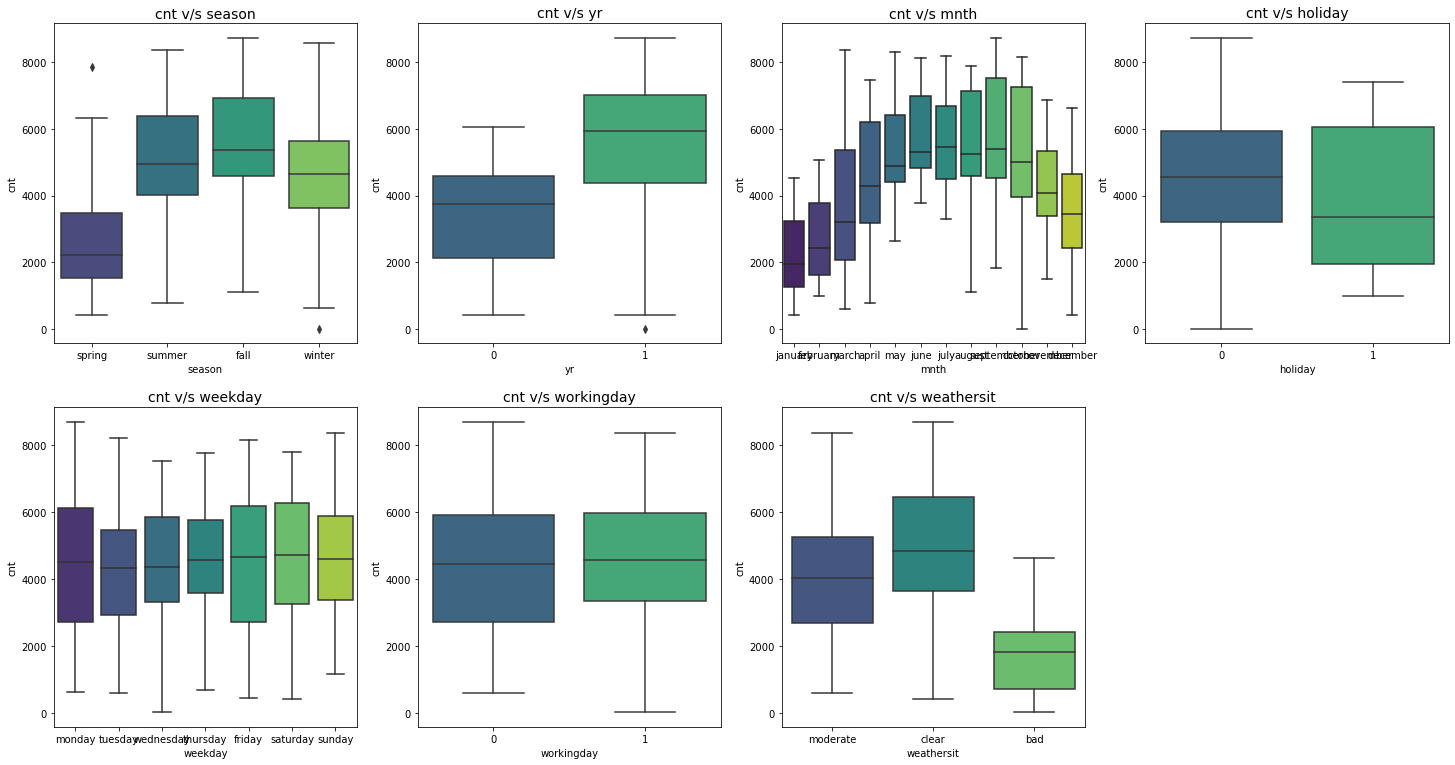

In [819]:
plt.figure(figsize=(25,20))
for i in range(min(7,len(df.columns))):
    plt.subplot(3,4, i + 1)
    ax=sns.boxplot(x=df.columns[i], y='cnt', data=df,palette = 'viridis')
    ax.set_title('cnt v/s '+str(df.columns[i]), fontsize=14)
plt.show()

show distribution plot for each numeric column in bike sharing data frame

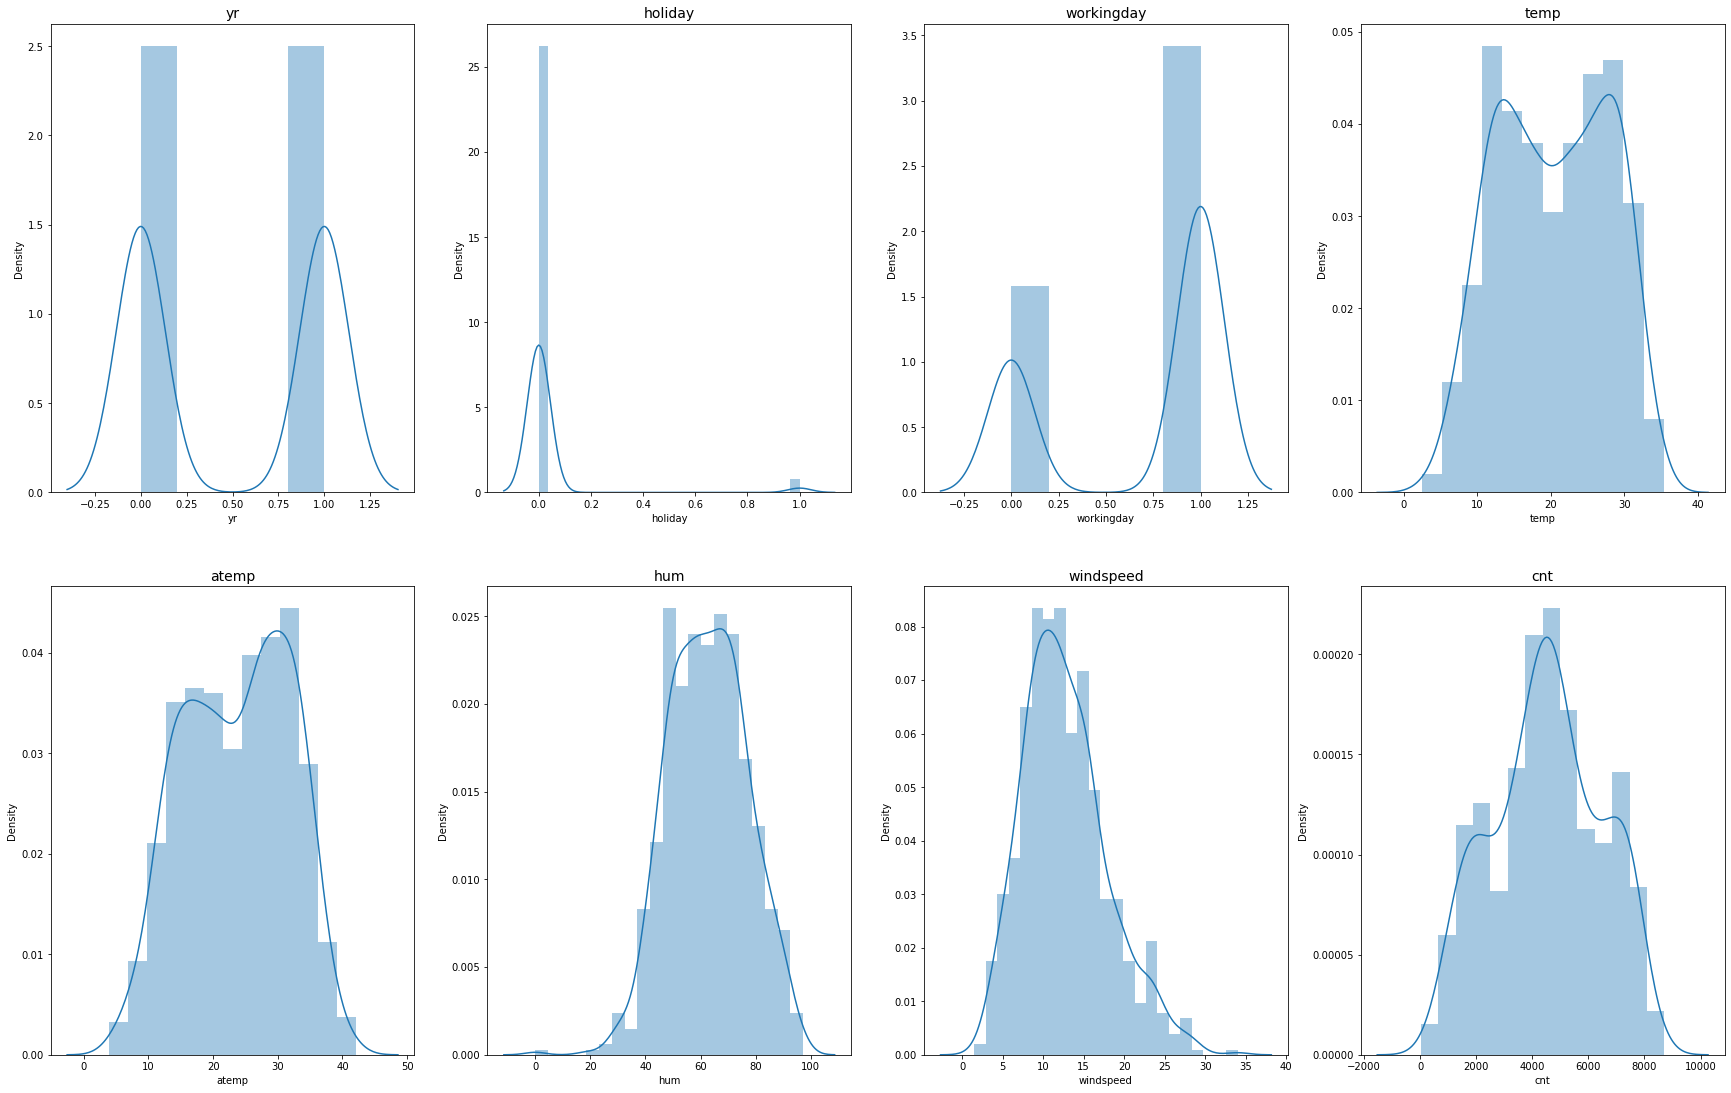

In [820]:
plt.figure(figsize=(30,50))
for i in range(min(20,len(df_visu_numeric.columns))):
    plt.subplot(5,4, i + 1)
    ax=sns.distplot(df[df_visu_numeric.columns[i]])
    ax.set_title(str(df_visu_numeric.columns[i]), fontsize=14)
plt.show()

show bar plot for each columns with respect to 'cnt' as target variable in bike sharing data frame

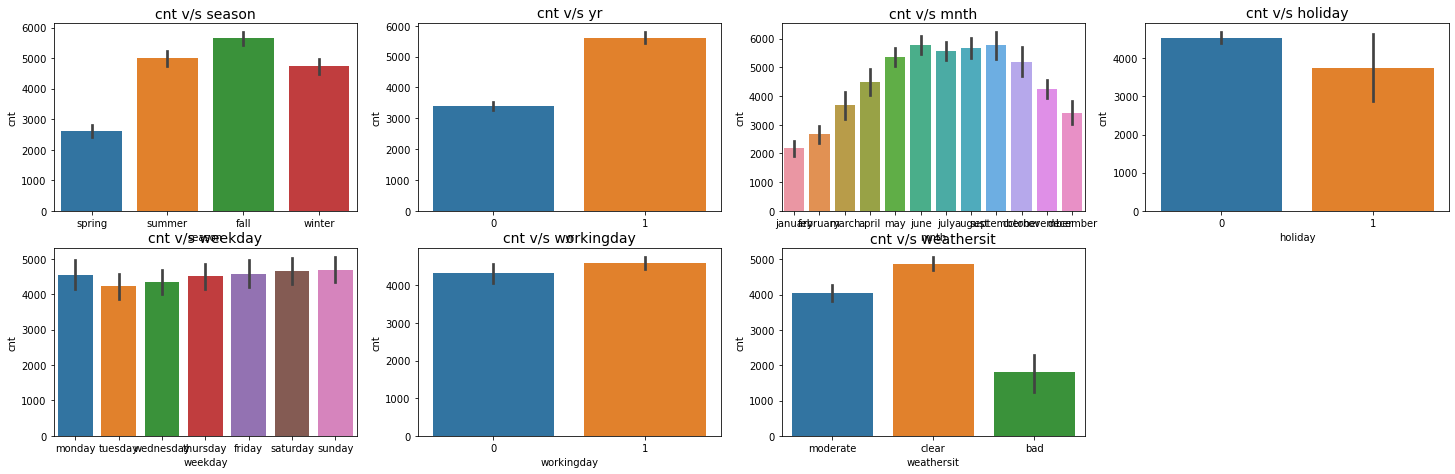

In [821]:
plt.figure(figsize=(25,20))
for i in range(min(7,len(df.columns))):
    plt.subplot(5,4, i + 1)
    ax=sns.barplot(df.columns[i],'cnt',data=df)    
    ax.set_title('cnt v/s '+str(df.columns[i]), fontsize=14)
plt.show()

show the count plot for data analysis

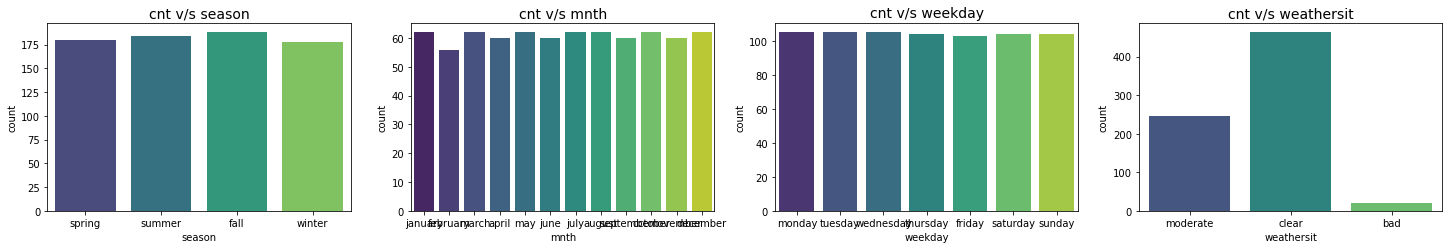

In [822]:
plt.figure(figsize=(25,20))
for i in range(min(7,len(df_visu_categoric.columns))):
    plt.subplot(5,4, i + 1)
    ax=sns.countplot(df[df_visu_categoric.columns[i]],palette = 'viridis')    
    ax.set_title('cnt v/s '+str(df_visu_categoric.columns[i]), fontsize=14)
plt.show()

show bar plot for each columns with respect to 'cnt' as target variable in bike sharing data frame(years wise, 0:2018 and 1:2019)

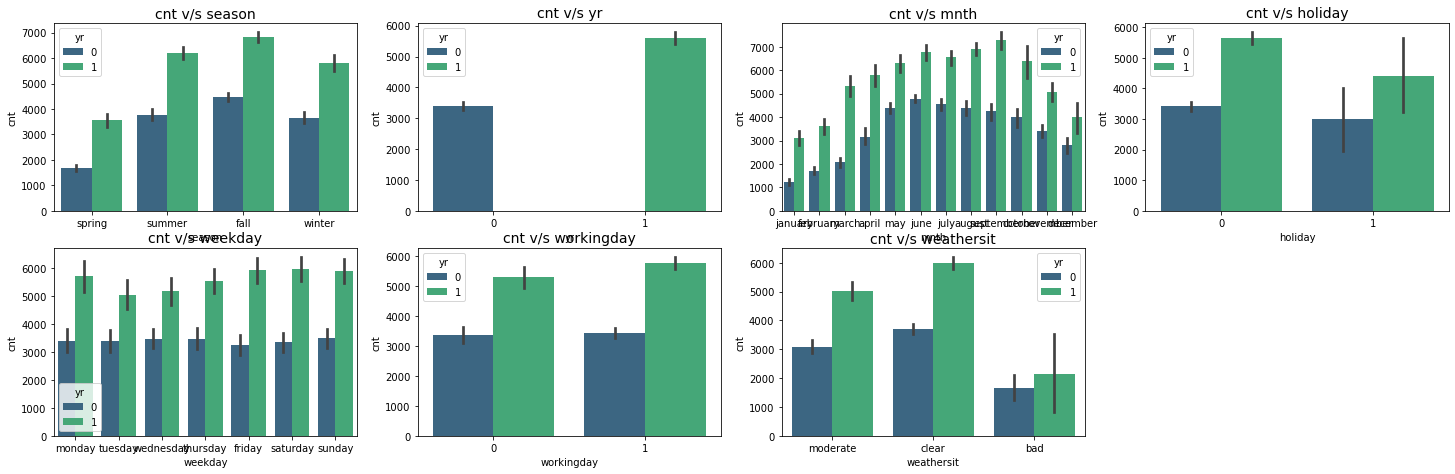

In [823]:
plt.figure(figsize=(25,20))
for i in range(min(7,len(df.columns))):
    plt.subplot(5,4, i + 1)
    #ax=sns.barplot(df.columns[i],'cnt',data=df)
    ax=sns.barplot(df.columns[i],'cnt',data=df, hue='yr',palette='viridis')
    ax.set_title('cnt v/s '+str(df.columns[i]), fontsize=14)
plt.show()

show pair wise plot for bike sharing data frame, to check relation between each independent variable

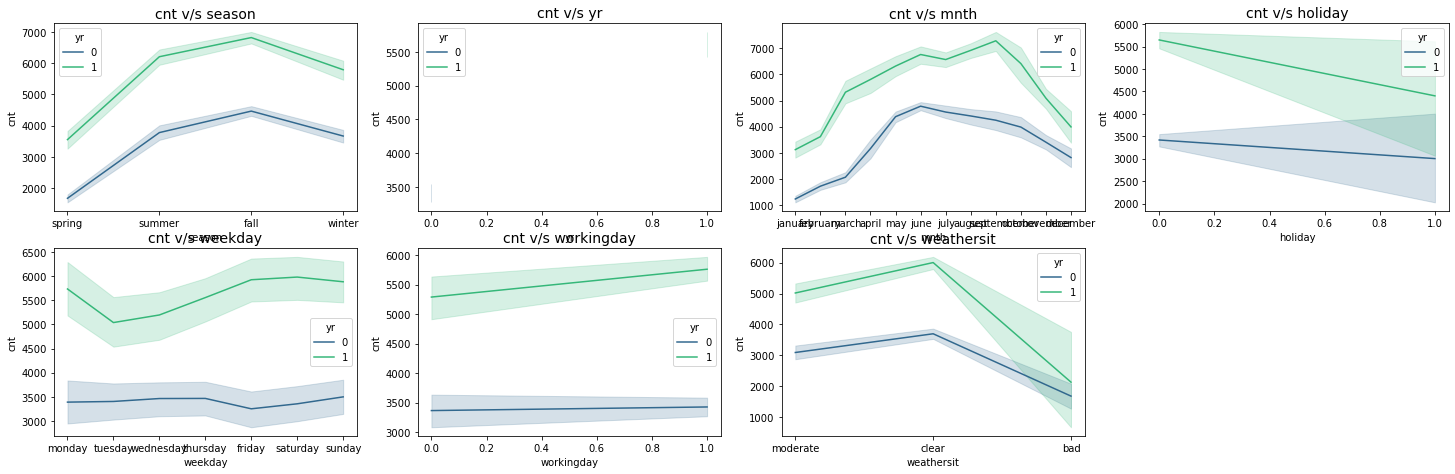

In [855]:
plt.figure(figsize=(25,20))
for i in range(min(7,len(df.columns))):
    plt.subplot(5,4, i + 1)    
    ax=sns.lineplot(x=df.columns[i], y='cnt', data=df,palette = 'viridis', hue="yr", markers=True)
    ax.set_title('cnt v/s '+str(df.columns[i]), fontsize=14)
plt.show()

<Figure size 1080x1080 with 0 Axes>

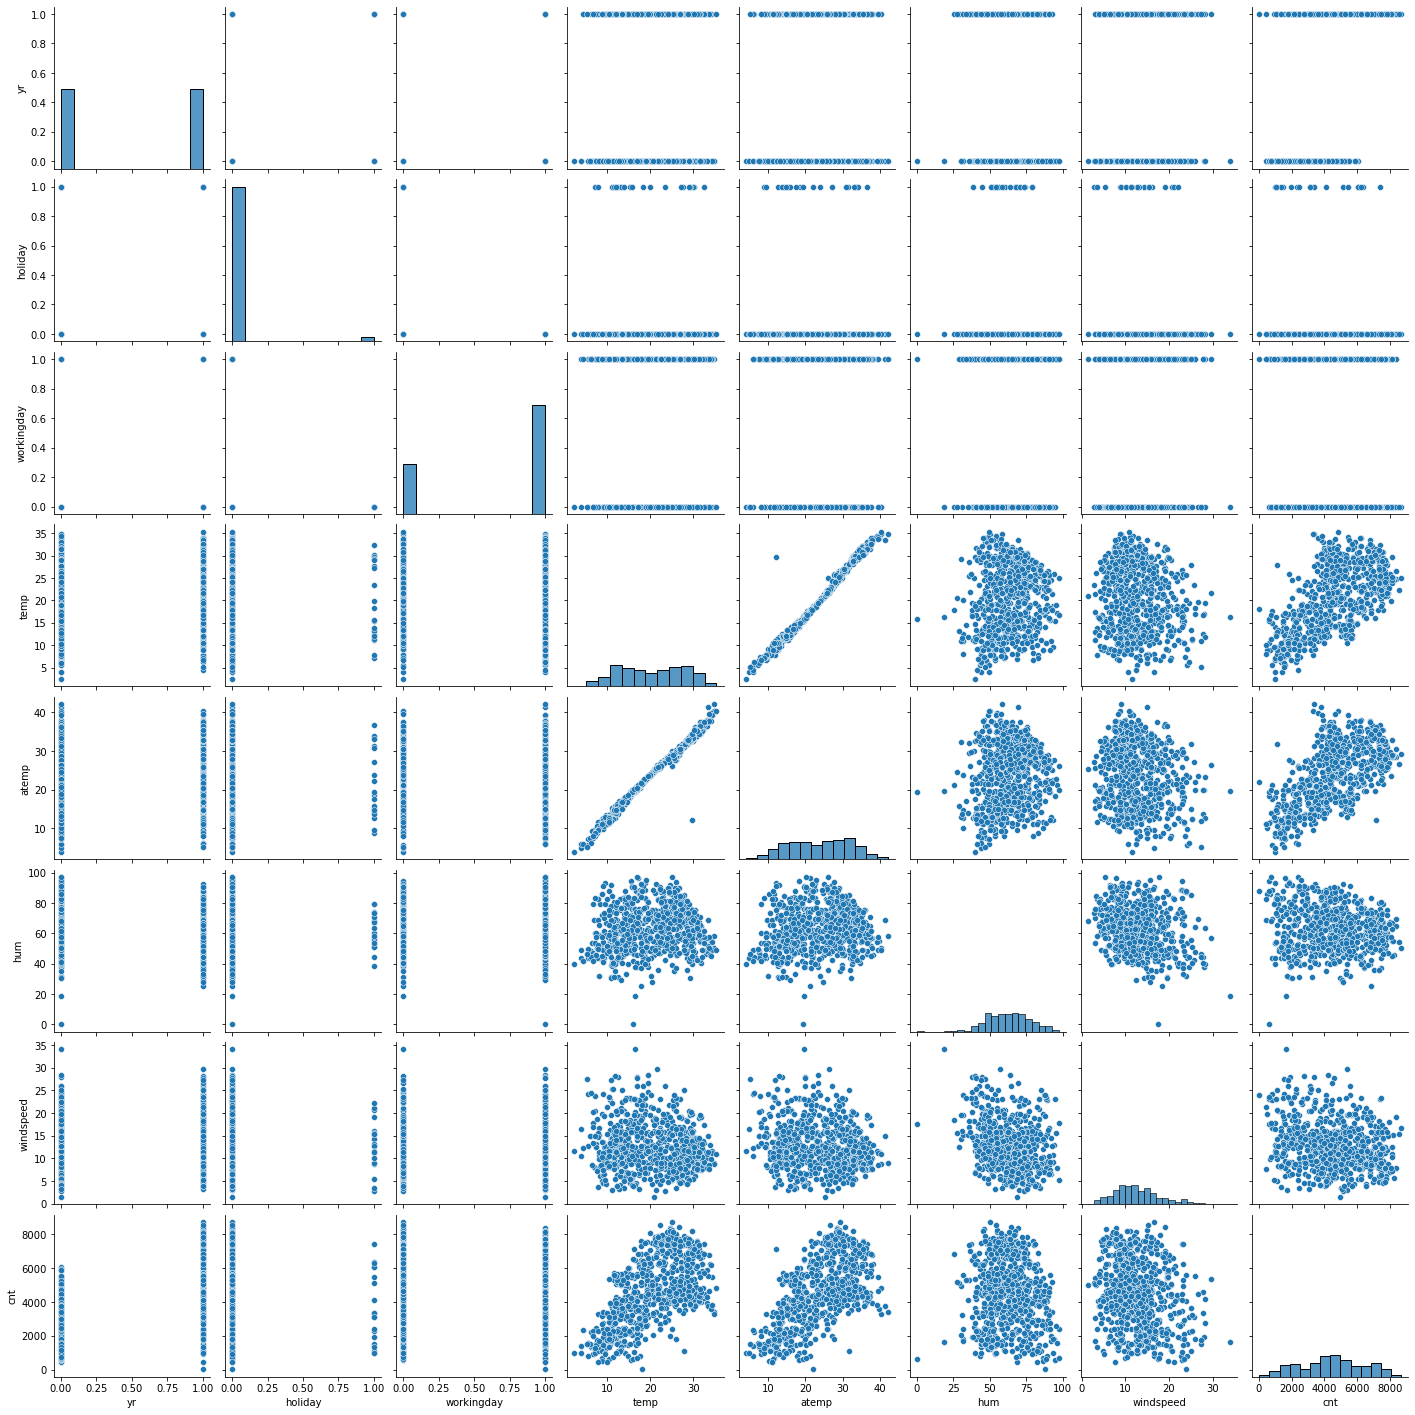

In [824]:
plt.figure(figsize=(15,15))
sns.pairplot(df)
plt.show()

show heatmap for bike sharing data frame, to check correlation between each independent variable

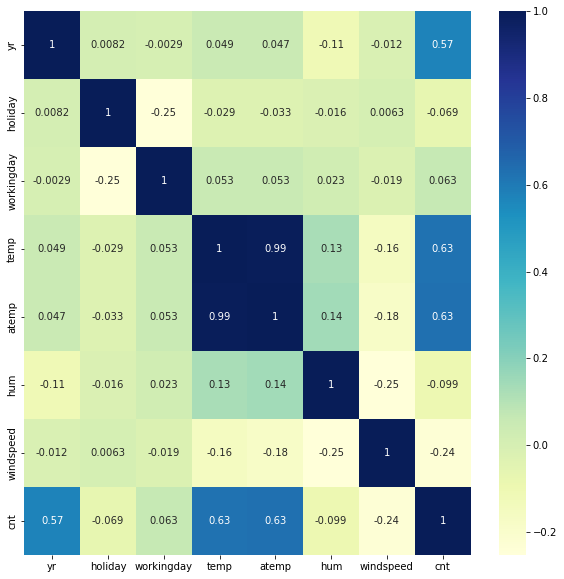

In [825]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)
plt.show()

In [826]:
bike_sharing.drop(['temp'],axis=1,inplace=True)

# Conclusion from Bike Sharing dataset EDA

- Also it is quite clear that atemp is directly derived from temp and hence if temp is taken into account, atemp becomes redundant.
- The Hiring rate is  more for 2019 than 2018
- Fall shows a higher demand followed by summer season
- May to October period also shows a higher demand then other parts of the year
- working days are having a higher demand than holidays and weekends
- Clear weather days attract a hire demand then other days.
- Temperature is having a positive correlation(0.63) with demand. And higher temp attracts more bike hiring.
- Windspeed shows somewhat negative correlations(-0.24) with count.


get dummies for "season","mnth","weekday","weathersit" to build Linear Regression model using multiple variables

In [827]:
bike_sharing = pd.get_dummies(data=bike_sharing,columns=["season","mnth","weekday","weathersit"],drop_first=True)
bike_sharing.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_august,mnth_december,mnth_february,mnth_january,mnth_july,mnth_june,mnth_march,mnth_may,mnth_november,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_clear,weathersit_moderate
instant,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,18.18,80.58,10.75,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,0,0,17.69,69.61,16.65,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,0,1,9.47,43.73,16.64,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,0,0,1,10.61,59.04,10.74,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
5,0,0,1,11.46,43.70,12.52,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [828]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
#split the dataset into 70% train and 30% test using train_test_split funstion
df_train, df_test = train_test_split(bike_sharing, train_size = 0.7, test_size = 0.3, random_state = 17)

In [829]:
#get min max sclar object
scaler = MinMaxScaler()

In [830]:
#describe bike sharing dataset
bike_sharing.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_august,mnth_december,mnth_february,mnth_january,mnth_july,mnth_june,mnth_march,mnth_may,mnth_november,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_clear,weathersit_moderate
count,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,0.50,0.03,0.68,23.73,62.77,12.76,4508.01,0.25,0.25,0.24,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.14,0.14,0.14,0.14,0.14,0.14,0.63,0.34
std,0.50,0.17,0.47,8.15,14.24,5.20,1936.01,0.43,0.43,0.43,0.28,0.28,0.27,0.28,0.28,0.27,0.28,0.28,0.27,0.28,0.27,0.35,0.35,0.35,0.35,0.35,0.35,0.48,0.47
min,0.00,0.00,0.00,3.95,0.00,1.50,22.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,16.89,52.00,9.04,3169.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.50,0.00,1.00,24.37,62.62,12.13,4548.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,1.00,0.00,1.00,30.45,72.99,15.63,5966.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
max,1.00,1.00,1.00,42.04,97.25,34.00,8714.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [831]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [832]:
y_train = df_train.pop('cnt')
X_train = df_train

In [833]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 356 to 242
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   510 non-null    int64  
 1   holiday              510 non-null    int64  
 2   workingday           510 non-null    int64  
 3   atemp                510 non-null    float64
 4   hum                  510 non-null    float64
 5   windspeed            510 non-null    float64
 6   season_spring        510 non-null    uint8  
 7   season_summer        510 non-null    uint8  
 8   season_winter        510 non-null    uint8  
 9   mnth_august          510 non-null    uint8  
 10  mnth_december        510 non-null    uint8  
 11  mnth_february        510 non-null    uint8  
 12  mnth_january         510 non-null    uint8  
 13  mnth_july            510 non-null    uint8  
 14  mnth_june            510 non-null    uint8  
 15  mnth_march           510 non-null    u

In [834]:
def VIF_SCORE(X):
    vif = pd.DataFrame()    
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif
    return vif

In [835]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [836]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 9),
 ('season_winter', True, 1),
 ('mnth_august', False, 13),
 ('mnth_december', True, 1),
 ('mnth_february', True, 1),
 ('mnth_january', True, 1),
 ('mnth_july', True, 1),
 ('mnth_june', False, 14),
 ('mnth_march', False, 10),
 ('mnth_may', False, 6),
 ('mnth_november', True, 1),
 ('mnth_october', False, 7),
 ('mnth_september', True, 1),
 ('weekday_monday', False, 4),
 ('weekday_saturday', False, 11),
 ('weekday_sunday', False, 8),
 ('weekday_thursday', False, 12),
 ('weekday_tuesday', False, 2),
 ('weekday_wednesday', False, 3),
 ('weathersit_clear', True, 1),
 ('weathersit_moderate', True, 1)]

In [837]:
col = X_train.columns[rfe.support_]
X_train_new = X_train[col]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_december', 'mnth_february', 'mnth_january',
       'mnth_july', 'mnth_november', 'mnth_september', 'weathersit_clear',
       'weathersit_moderate'],
      dtype='object')

In [838]:
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_august', 'mnth_june', 'mnth_march',
       'mnth_may', 'mnth_october', 'weekday_monday', 'weekday_saturday',
       'weekday_sunday', 'weekday_thursday', 'weekday_tuesday',
       'weekday_wednesday'],
      dtype='object')

In [839]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train_new
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())
VIF_SCORE(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     193.2
Date:                Wed, 31 Aug 2022   Prob (F-statistic):          1.60e-195
Time:                        20:44:08   Log-Likelihood:                 510.99
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     494   BIC:                            -922.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1066    

,Features,VIF
2,atemp,21.59
3,hum,14.97
13,weathersit_clear,13.98
14,weathersit_moderate,8.13
4,windspeed,5.09
5,season_spring,5.08
6,season_winter,2.96
9,mnth_january,2.53
8,mnth_february,2.21
11,mnth_november,2.02


In [840]:
X_train_new = X_train_new.drop(["atemp"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())
VIF_SCORE(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     142.5
Date:                Wed, 31 Aug 2022   Prob (F-statistic):          2.04e-163
Time:                        20:44:08   Log-Likelihood:                 431.66
No. Observations:                 510   AIC:                            -833.3
Df Residuals:                     495   BIC:                            -769.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2876    

,Features,VIF
2,hum,9.62
12,weathersit_clear,8.12
13,weathersit_moderate,6.60
3,windspeed,5.04
4,season_spring,4.33
5,season_winter,2.78
8,mnth_january,2.31
7,mnth_february,2.14
0,yr,1.97
10,mnth_november,1.90


In [841]:
X_train_new = X_train_new.drop(["hum"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())
VIF_SCORE(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     153.4
Date:                Wed, 31 Aug 2022   Prob (F-statistic):          2.72e-164
Time:                        20:44:08   Log-Likelihood:                 431.12
No. Observations:                 510   AIC:                            -834.2
Df Residuals:                     496   BIC:                            -775.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2485    

,Features,VIF
11,weathersit_clear,5.09
2,windspeed,5.02
3,season_spring,4.33
12,weathersit_moderate,3.04
4,season_winter,2.70
7,mnth_january,2.31
6,mnth_february,2.14
0,yr,1.97
9,mnth_november,1.90
5,mnth_december,1.54


In [842]:
X_train_new = X_train_new.drop(["mnth_july"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())
VIF_SCORE(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     165.8
Date:                Wed, 31 Aug 2022   Prob (F-statistic):          4.86e-165
Time:                        20:44:08   Log-Likelihood:                 430.23
No. Observations:                 510   AIC:                            -834.5
Df Residuals:                     497   BIC:                            -779.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2530    

,Features,VIF
2,windspeed,5.00
10,weathersit_clear,4.65
3,season_spring,4.25
11,weathersit_moderate,2.93
4,season_winter,2.63
7,mnth_january,2.31
6,mnth_february,2.14
0,yr,1.96
8,mnth_november,1.90
5,mnth_december,1.54


In [843]:
y_train_cnt = lm.predict(X_train_lm)

r2_score for traing dataset

In [844]:
r2_score(y_train, y_train_cnt)

0.8001119007942488

Text(0.5, 0, 'Errors')

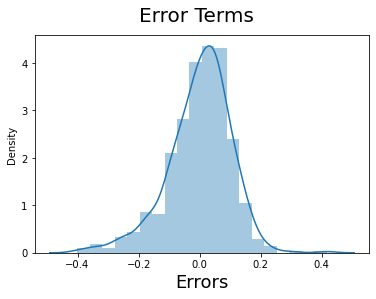

In [845]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [846]:
num_vars = ['atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [847]:
y_test = df_test.pop('cnt')
X_test = df_test

In [848]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0.5, 0, 'Errors')

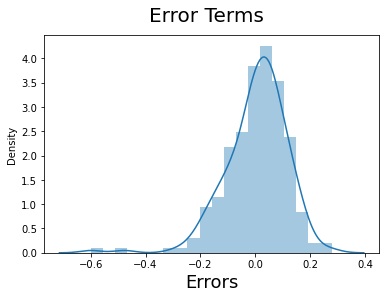

In [849]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0, 0.5, 'y_pred')

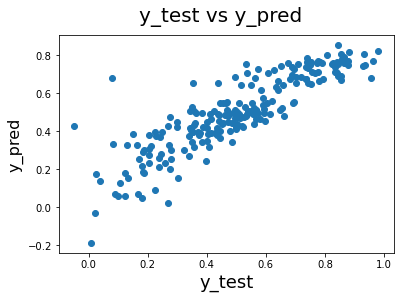

In [850]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [851]:
r2_score(y_test, y_pred)

0.7711425220989663

# Model building and evaluation Conclusion

- Final Equation for Prediction :

const               *         0.2530      +
yr                  *         0.2560      +
holiday             *        -0.0544      +
windspeed           *        -0.1670      +
season_spring       *        -0.2023      +
season_winter       *         0.0350      +
mnth_december       *        -0.1609      +
mnth_february       *        -0.1027      +
mnth_january        *        -0.1464      +
mnth_november       *        -0.1491      +
mnth_september      *         0.0591      +
weathersit_clear    *         0.2909      +
weathersit_moderate *         0.2008      

- r2_score for train data set is 80%
- r2_score for test data set is 77.11%

- we used RFE for automatic feature elimation , after that we removed 'atemp','hum','mnth_july' based on p and VIF values


